In [1]:
from SA.SA import run_SA
from ACA.ACA import run_ACA
from ALR.ALR import run_ALR

import numpy as np
import matplotlib.pyplot as plt


## Generate Data

In [2]:
dataset_size = 1
tsp_size = 20
points_coordinates = np.random.uniform(size=(dataset_size, tsp_size, 2))

## Run Solutions

In [3]:
SA_distance, SA_nodes, SA_time, SA_best_historical_dist = run_SA(points_coordinates, iterations=300, t_max=50, t_min=1)  # Simulated annealing
ACA_distance, ACA_nodes, ACA_time = run_ACA(points_coordinates, iterations=300, population=5, alpha=1, beta=2, rho=0.1) # Ant Colony Optimisation
ALR_distance, ALR_nodes, ALR_time = run_ALR(points_coordinates) # Attention Learn to Route


  [*] Loading model from ALR/pretrained/tsp_20/epoch-99.pt


In [4]:
print(f"---- SIMULATED ANNEALING ----")
print(f"Total Distance: {SA_distance}")
print(f"Nodes to Follow: {SA_nodes}")
print(f"Total Time: {SA_time}")
print("\n\n")
print(f"---- ANT COLONY OPTIMISATION ----")
print(f"Total Distance: {ACA_distance}")
print(f"Nodes to Follow: {ACA_nodes}")
print(f"Total Time: {ACA_time}")
print("\n\n")
print(f"---- GRAPH NEURAL NET ----")
print(f"Total Distance: {ALR_distance}")
print(f"Nodes to Follow: {ALR_nodes}")
print(f"Total Time: {ALR_time}")

---- SIMULATED ANNEALING ----
Total Distance: 5.926557466265286
Nodes to Follow: [ 6 13  7 11  3 17 16  8  9 12 10 19  4 14  5 15  2  0 18  1]
Total Time: 3.5499534606933594



---- ANT COLONY OPTIMISATION ----
Total Distance: 3.9039285296969712
Nodes to Follow: [ 0  2  6 14 10  7 16 12 13  8  9 11 17  3  4 19 15  5  1 18]
Total Time: 1.2717056274414062



---- GRAPH NEURAL NET ----
Total Distance: 3.9039285296969712
Nodes to Follow: [1, 18, 0, 2, 6, 14, 10, 7, 16, 12, 13, 8, 9, 11, 17, 3, 4, 19, 15, 5]
Total Time: 0.006339550018310547


## Plot Stuff

### SA Graphs


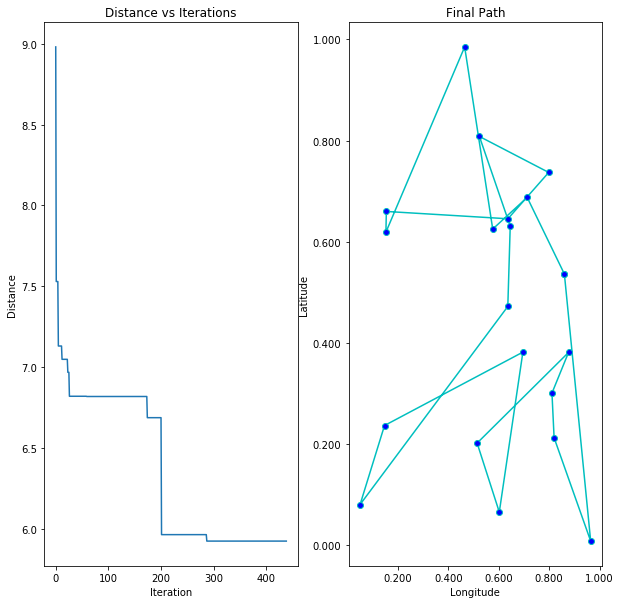

In [5]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(1, 2, figsize=(10,10))

best_points_ = np.concatenate([SA_nodes, [SA_nodes[0]]])
best_points_coordinate = points_coordinates[0][best_points_, :]
ax[0].plot(SA_best_historical_dist)
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Distance")
ax[0].title.set_text("Distance vs Iterations")
ax[1].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1],
           marker='o', markerfacecolor='b', color='c', linestyle='-')
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
ax[1].title.set_text('Final Path')

plt.show()

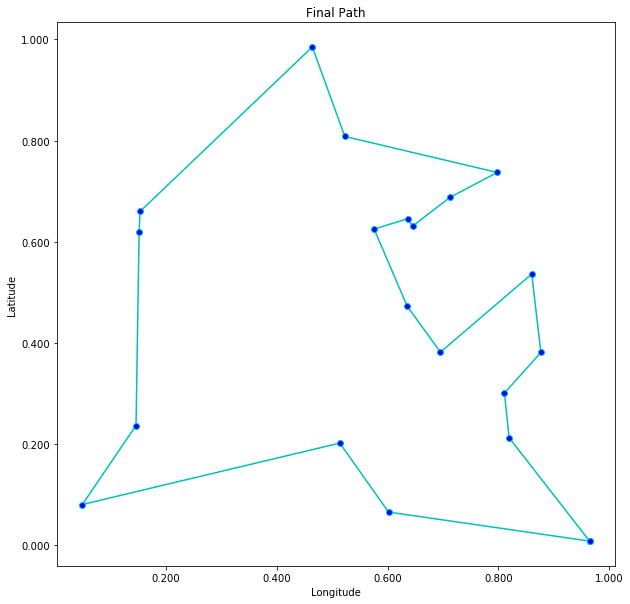

In [6]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(1, 1, figsize=(10,10))

best_points_ = np.concatenate([ALR_nodes, [ALR_nodes[0]]])
best_points_coordinate = points_coordinates[0][best_points_, :]

ax.plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1],
           marker='o', markerfacecolor='b', color='c', linestyle='-')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.title.set_text('Final Path')

plt.show()